# Project 1: Classification Analysis on Textual Data


## Getting familiar with the dataset


#### QUESTION 1: To get started, plot a histogram of the number of training documents per category to check if they are evenly distributed. 

##### OPEN ITEM - when I iterate through the target list, there are lot more cateogries then what is in my plot, I need to fix it 

In [25]:
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_20newsgroups
ng_train_tmp = fetch_20newsgroups(subset="train")


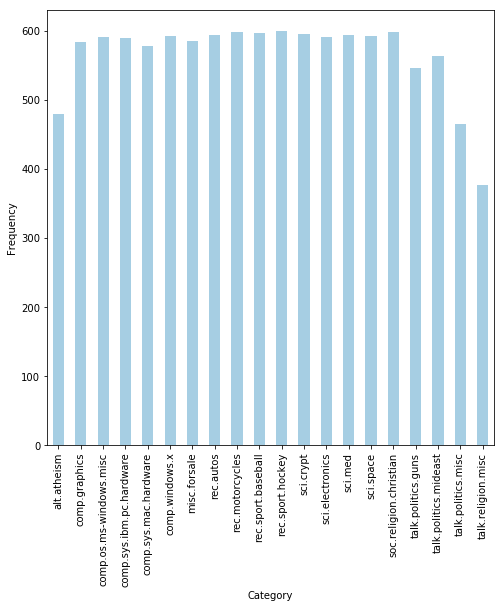

In [26]:
import numpy as np
import pandas as pd 

%matplotlib inline
category_id = list(ng_train_tmp.target)
df= pd.DataFrame({'target':category_id})

fig = plt.figure(figsize=(8,8))
width= 1.0
plt.xlabel('Category')
plt.ylabel('Frequency')
freq = df['target'].value_counts().sort_index()
ax = freq.plot(kind="bar",colormap='Paired')

ax.set_xticklabels(list(ng_train_tmp.target_names))

plt.show()



## Binary Classification

### Feature Extraction

#### Question 2: 

QUESTION 2: Use the following specs to extract features from the textual data: 
• Use the default stopwords of theCountVectorizer 
• Exclude terms that are numbers (e.g. “123”, “-45”, “6.7” etc.) 
• Perform lemmatization withn ltk.wordnet.WordNetLemmatizer and pos_tag 
• Use min_df=3 Report the shape of the TF-IDF matrices of the train and test subsets respectively


 ##### Open ITEM - need to exclude numbers (e.g 123, -45, 6. 7 etc - I need to add a condition to exclude the numbers , somehow it is throwing error, need to debug it


In [27]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 
              'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey'] 

ng_train = fetch_20newsgroups(subset="train", categories=categories,shuffle=True, random_state=42)

ng_test =  fetch_20newsgroups(subset="test", categories=categories,shuffle=True, random_state=42)

counts =[]
print(len(ng_train.data))
print(len(ng_test.data))

4732
3150


In [28]:

print(ng_train.target)
print(ng_train.target_names)
print(len(ng_train.filenames))

#for x in range (0,8):
 #   print(x, ng_train.target_names[x])
 #   print(x, ng_train.target[x])
 
for x in range(0,4732):
    if ng_train.target[x] > 3 :
        #print(ng_train.target[x])
        #print(ng_train.target_names[ng_train.target[x]])
        #print("Recreational")    
        ng_train.target[x] = 1
        #print(ng_train.target[x])
    else:
        #print(ng_train.target[x])
        #print(ng_train.target_names[ng_train.target[x]])
        #print("Computer") 
        ng_train.target[x] = 0
        #print(ng_train.target[x])
    
for x in range(0,3150):
    if ng_test.target[x] > 3 :
        #print(ng_train.target[x])
        #print(ng_train.target_names[ng_train.target[x]])
        #print("Recreational")    
        ng_test.target[x] = 1
        #print(ng_train.target[x])
    else:
        #print(ng_train.target[x])
        #print(ng_train.target_names[ng_train.target[x]])
        #print("Computer") 
        ng_test.target[x] = 0
        #print(ng_train.target[x])
 #print(ng_train.target[0])
#for x in range(0,4732):
 #   if ng_train.target[x] > 3 :
  #      ng_train.target[x] = 0
   # else:
    #    ng_train.target[x] = 1
    
print(np.unique(ng_train.target))
    
#for x in range(0,20):
    #print(x, ng_train.target_names[ng_train.target[x]])
 #   print(ng_train.target[x])
   # print(ng_train.target_names[x])


#for x in range(0,2):
 #   ng_train.target
print(ng_train.target)
print(ng_test.target)

[6 7 4 ..., 6 6 2]
['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
4732
[0 1]
[1 1 1 ..., 1 1 0]
[0 0 0 ..., 1 0 0]


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
import nltk
from nltk import pos_tag
wnl = nltk.wordnet.WordNetLemmatizer()
analyzer=CountVectorizer().build_analyzer()
import re
pattern = re.compile("[+-]?\d+(?:\.\d+)?$")



def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
def lemmatize_sent(list_word):
    return [wnl.lemmatize(word.lower(),pos=penn2morphy(tag)) 
           for word, tag in pos_tag(list_word)]

def lem_rmv_digit(doc):
    word = [word for word in lemmatize_sent(analyzer(doc))]
    return (filter(lambda x: not pattern.match(x),word))
   
count_vect = CountVectorizer(min_df=3, stop_words="english",analyzer=lem_rmv_digit)
X_train_counts = count_vect.fit_transform(ng_train.data)
X_test_counts = count_vect.transform(ng_test.data)
print(X_train_counts.shape)
print(X_test_counts.shape)

(4732, 16600)
(3150, 16600)


In [30]:
#count_vect.get_feature_names()

### Dimensionality Reduction
#### Question 3:
Reduce the dimensionality of the data using the methods above
1) Apply LSI to the TF-IDF matrix corresponding to the 8 categories with k = 50; so each document is mapped to a 50-dimensional vector
2) Also reduce dimensionality through NMF and compare with LSI:

3) Which one is larger, the∥X−WH∥2 F in NMF or the X−UkΣkVT k 2 F in LSI? Why is the case?

##### Open Item : number 3 on comparing the output is still pending
In below section i am doing TFID transformation of the data

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)
#print('-' * 20)
#print(X_train_counts.toarray()[:30,:5])
#print('-' * 20)
#print(X_train_tfidf.toarray()[:30,:5])

(4732, 16600)


Below code covers LSI AND NMF dimensionality reduction pieces


In [32]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=0)
X_train_reduced = svd.fit_transform(X_train_tfidf)
VTrans = svd.components_
print(X_train_tfidf.shape)
#print(X_train_reduced.shape)
#print(VTrans.shape)
reducedVtrans = np.dot(X_train_reduced, VTrans)
print(reducedVtrans.shape)
#print(count_vect.get_feature_names())
#subtract = np.setdiff1d(X_train_tfidf,reducedVtrans)
#print(subtract.shape)

#svd_opt = np.sum((X_train_tfidf - reducedVtrans)**2)
#print(X_train_reduced.shape)
X_inverse = svd.inverse_transform(X_train_reduced)
FN_2 = np.sum(np.array(X_train_tfidf - X_inverse)**2)
print("Frobenius Norm for SVD %s" %FN_2)

(4732, 16600)
(4732, 16600)
Frobenius Norm for SVD 3895.6016689


In [33]:
from sklearn.decomposition import NMF


model = NMF(n_components=50, init='random', random_state=0)
W_train_reduced = model.fit_transform(X_train_tfidf)
H = model.components_
#NMF_opt = np.sum((X_train_tfidf - W_train_reduced.dot(H))**2)
#print(NMF_opt)

print(W_train_reduced.shape)

# calculate Frobenius Norm 

#invserse transform of NMF
W_inverse = model.inverse_transform(W_train_reduced)

FN_2 = np.sum(np.array(X_train_tfidf - W_inverse)**2)
print("Frobenius Norm for NMF %s" %FN_2)



(4732, 50)
Frobenius Norm for NMF 3940.55776679


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline


def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    prob_score = pipe.predict_proba(test_data)

    fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
    return pipe

def all_scores(y_test,y_predicted):
    #Print the Accuracey Score 
    print("Accuracy of the model is:", accuracy_score(y_test,y_predicted))
   
    # Print the recall
    print("Recall of the model is:", recall_score(y_test,y_predicted))

    #Print the precision score
    print("Precision of the model is:", precision_score(y_test,y_predicted))

    #Print the F1 Score 
    print("F1 Score of the model is:", f1_score(y_test,y_predicted))
   
    


In [35]:
X_test_counts = count_vect.transform(ng_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_reduced = svd.transform(X_test_tfidf)
print(len(ng_test.filenames))
#print(len(X_test_tfidf.toarray()))
print(X_test_reduced.shape)
print(len(ng_test.data))

3150
(3150, 50)
3150


### Question 4 : SVM

Accuracy of the model is: 0.970793650794
Recall of the model is: 0.977358490566
Precision of the model is: 0.965217391304
F1 Score of the model is: 0.97125
Confusion Matrix:
[[1504   56]
 [  36 1554]]
 Coefficents of the Model:
[[ -1.19863262  62.32629072  -5.2083535  -45.35165142  27.97819148
   -0.27405041  11.35951564  -8.98354898  -6.42929963  -7.5864937
   -3.90052426  13.61681509  20.81967493   7.79952235  -8.78317836
    3.82542339  -1.93574226 -10.81708257  -0.93863    -15.93110031
   -4.59266349  -4.59329526  -6.04223832   8.43346149  -2.74190378
   -6.24630259   4.63337224   5.1712103   11.93405354 -15.33778254
   -2.79999893  -4.8385031    5.11500693  -6.17789598  -5.10234702
   -3.66315175   0.52508867  -0.67091373   1.59085813   5.75646612
   -4.32532274  -1.93353604   2.47799007   7.33839594  -2.24520764
   -5.10589691   2.47900037  -0.13023118  -0.84157397  -0.6758555 ]]


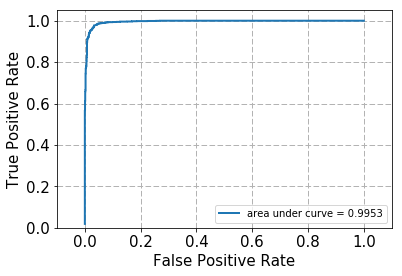

In [39]:
# Hard Margin SVM for training set
from sklearn.svm import SVC
h_svm = SVC(kernel = 'linear', random_state = 0, C=1000, probability = True)
h_svm.fit(X_train_reduced,ng_train.target)

# The Below code predicts the test results
predicted = h_svm.predict(X_test_reduced)
prob_scores = h_svm.predict_proba(X_test_reduced)
fpr,tpr,_ = roc_curve(ng_test.target,prob_scores[:,1])
#print(prob_scores[:,1])

plot_roc(fpr,tpr)   

all_scores(ng_test.target, predicted)

cnf_matrix = confusion_matrix(ng_test.target,predicted)

print("Confusion Matrix:")
print (cnf_matrix)
print(" Coefficents of the Model:")
print(h_svm.coef_)

Accuracy of the model is: 0.504761904762
Recall of the model is: 1.0
Precision of the model is: 0.504761904762
F1 Score of the model is: 0.670886075949
Confusion Matrix:
[[   0 1560]
 [   0 1590]]
 Coefficents of the Model:
[[  5.88543031e-03   2.71173142e-02  -1.03643200e-03  -1.08954379e-02
    7.10352298e-03   2.33738640e-04   2.27632208e-03   7.24117198e-04
   -9.90202892e-04  -1.62524277e-03  -1.20732033e-03   2.41549744e-03
    2.43043123e-03   1.22512736e-03  -1.91438980e-03  -3.50492709e-04
   -9.06956498e-04  -4.87162769e-04   2.15759272e-04  -1.68236024e-03
   -2.31904701e-04   3.61668005e-04   9.50614250e-05   1.37211657e-03
   -6.40267202e-04  -9.52206468e-04  -1.96325225e-04  -5.06880851e-04
    7.84659898e-04   1.23373014e-04  -1.47589090e-04  -1.03435332e-03
    7.03721168e-05   6.74603352e-04  -1.12611409e-03   5.78267602e-05
   -2.04120740e-04   5.75438707e-04   2.10960268e-04   3.32631385e-05
   -5.66399258e-04  -3.98408066e-04   7.45017678e-04   3.09910664e-04
   -1.

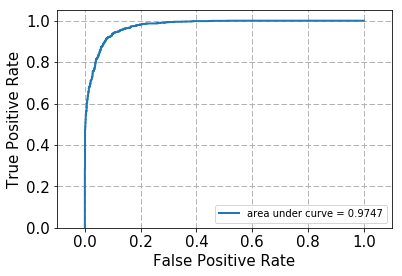

In [40]:
#########################################################################################################
# Soft Margin SVM for training set

soft_svm = SVC(kernel = 'linear', random_state = 0, C=0.0001, probability = True)
soft_svm.fit(X_train_reduced,ng_train.target)

# The Below code predicts the test results
# Predicting the Test set results
predicted = soft_svm.predict(X_test_reduced)

prob_scores = soft_svm.predict_proba(X_test_reduced)
fpr,tpr,_ = roc_curve(ng_test.target,prob_scores[:,1])
#print(prob_scores[:,1])

plot_roc(fpr,tpr)   

all_scores(ng_test.target, predicted)

cnf_matrix = confusion_matrix(ng_test.target,predicted)

print("Confusion Matrix:")
print (cnf_matrix)
print(" Coefficents of the Model:")
print(soft_svm.coef_)

In [44]:
#########################################################################################################
# The below code applies K Fold Cross Validation
from sklearn.model_selection import GridSearchCV
parametergrid = {'C':[0.001,0.01,0.1,1,10,100,1000]}
classifier = GridSearchCV(estimator = h_svm,param_grid = parametergrid, cv=5)
classifier.fit(X_train_reduced,ng_train.target)
classifier.cv_results_
classifier.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

Accuracy of the model is: 0.970793650794
Recall of the model is: 0.977358490566
Precision of the model is: 0.965217391304
F1 Score of the model is: 0.97125
Confusion Matrix:
[[1504   56]
 [  36 1554]]
 Coefficents of the Model:
[[ -1.19863262  62.32629072  -5.2083535  -45.35165142  27.97819148
   -0.27405041  11.35951564  -8.98354898  -6.42929963  -7.5864937
   -3.90052426  13.61681509  20.81967493   7.79952235  -8.78317836
    3.82542339  -1.93574226 -10.81708257  -0.93863    -15.93110031
   -4.59266349  -4.59329526  -6.04223832   8.43346149  -2.74190378
   -6.24630259   4.63337224   5.1712103   11.93405354 -15.33778254
   -2.79999893  -4.8385031    5.11500693  -6.17789598  -5.10234702
   -3.66315175   0.52508867  -0.67091373   1.59085813   5.75646612
   -4.32532274  -1.93353604   2.47799007   7.33839594  -2.24520764
   -5.10589691   2.47900037  -0.13023118  -0.84157397  -0.6758555 ]]


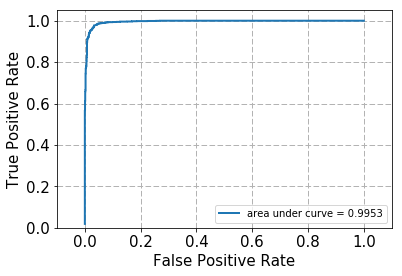

In [43]:
# Most effecient SVM to training set
mosteffecient_classifier = SVC(kernel = 'linear', random_state = 0, C=1000, probability = True)
mosteffecient_classifier.fit(X_train_reduced,ng_train.target)
predicted = mosteffecient_classifier.predict(X_test_reduced)

prob_scores = mosteffecient_classifier.predict_proba(X_test_reduced)
fpr,tpr,_ = roc_curve(ng_test.target,prob_scores[:,1])
#print(prob_scores[:,1])

plot_roc(fpr,tpr)   

all_scores(ng_test.target, predicted)

cnf_matrix = confusion_matrix(ng_test.target,predicted)

print("Confusion Matrix:")
print (cnf_matrix)
print(" Coefficents of the Model:")
print(mosteffecient_classifier.coef_)

#### Logistics Regression .
##### Question 5:  Logistic classifier:
1. Train a logistic classifier; plot the ROC curve and report the confusion matrix
and calculate the accuracy, recall precision and F-1 score of this classifier.

2. Regularization:
    a. Using 5-fold cross-validation, find the best regularization strength in the
    range f10kj􀀀3  k  3; k 2 Zg for logistic regression with L1 regularization
    and logistic regression L2 regularization, respectively.
    
    b. Compare the performance (accuracy, precision, recall and F-1 score) of
    
    c. logistic classifiers: w/o regularization, w/ L1 regularization and w/ L2
    regularization, using test data. How does the regularization parameter
    affect the test error? How are the learnt coefficients affected? Why
    might one be interested in each type of regularization?

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

In [48]:
##### 5.1
Logclassifier = LogisticRegression(random_state = 0)
Logclassifier.fit(X_train_reduced,ng_train.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Accuracy of the model is: 0.96
Recall of the model is: 0.971698113208
Precision of the model is: 0.950184501845
F1 Score of the model is: 0.960820895522
Confusion Matrix:
[[1479   81]
 [  45 1545]]
 Coefficents of the Model:
[[  1.14613144  23.35250208  -1.65092816 -12.35962006   8.87947353
    0.85041467   3.29278457   0.78958402  -1.7192774   -2.62607303
   -1.46793169   3.37436128   4.3462573    2.34316395  -3.01401908
    0.04389408  -1.4855577   -1.04844268   0.40062016  -2.70498815
   -0.53142661   0.33981114  -0.30849439   2.38813598  -1.20218861
   -1.67597023  -0.35774653  -0.79153053   1.72065624  -0.67653047
   -0.21399583  -1.90795898   0.51842685   0.67808695  -2.20889954
    0.13057266  -0.22884153   0.95746326   0.41484808   0.18755587
   -1.04160419  -0.60422751   1.57966639   0.88629675  -0.24322118
   -1.31481388   0.43205466   0.07415613  -0.21715946   0.39981137]]


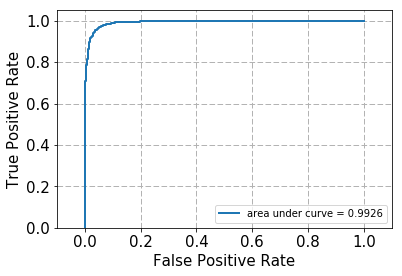

In [49]:
predicted = Logclassifier.predict(X_test_reduced)

prob_scores = Logclassifier.predict_proba(X_test_reduced)
fpr,tpr,_ = roc_curve(ng_test.target,prob_scores[:,1])


plot_roc(fpr,tpr)   

all_scores(ng_test.target, predicted)

cnf_matrix = confusion_matrix(ng_test.target,predicted)

print("Confusion Matrix:")
print (cnf_matrix)
print(" Coefficents of the Model:")
print(Logclassifier.coef_)

In [52]:
### Part 5.2 a

#Using regularization in Logistic regression
parameters = [{'C': [0.001,0.01,0.1,1, 10, 100, 1000], 'penalty': ['l2']},
               {'C': [0.001,0.01,0.1,1, 10, 100, 1000], 'penalty': ['l1']}]
grid_search = GridSearchCV(estimator = Logclassifier, param_grid = parameters, cv = 5)
grid_search = grid_search.fit(X_train_reduced,ng_train.target)
grid_search.best_score_
grid_search.best_params_
grid_search.cv_results_

pd.DataFrame(grid_search.cv_results_)

/home/veerv/SW/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/veerv/SW/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/veerv/SW/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/veerv/SW/anaconda3/li

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_penalty,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.024675,0.002062,0.616653,0.616547,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",13,0.624076,0.614267,...,0.608237,0.617173,0.630021,0.627047,0.616931,0.612886,0.002999,0.001629,0.009640,0.005588
1,0.044754,0.003619,0.936602,0.939138,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",11,0.920803,0.939762,...,0.935586,0.940291,0.947146,0.941627,0.933333,0.939530,0.004367,0.002019,0.009631,0.002441
2,0.037483,0.000770,0.955833,0.956731,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",9,0.946146,0.956143,...,0.947202,0.958256,0.958774,0.959588,0.958730,0.955902,0.018157,0.000150,0.008265,0.002016
3,0.030179,0.000727,0.969358,0.970414,1,l2,"{'C': 1, 'penalty': 'l2'}",7,0.964097,0.970410,...,0.967265,0.970674,0.966173,0.972002,0.968254,0.972010,0.002618,0.000050,0.005981,0.001842
4,0.056825,0.002271,0.973795,0.975592,10,l2,"{'C': 10, 'penalty': 'l2'}",6,0.970433,0.976222,...,0.975713,0.975165,0.970402,0.976492,0.972487,0.976763,0.023412,0.002045,0.003632,0.001260
5,0.085423,0.000734,0.975063,0.978075,100,l2,"{'C': 100, 'penalty': 'l2'}",1,0.973601,0.978336,...,0.974657,0.978071,0.972516,0.980190,0.974603,0.978083,0.025349,0.000065,0.002560,0.001429
6,0.079057,0.000751,0.974641,0.978180,1000,l2,"{'C': 1000, 'penalty': 'l2'}",3,0.974657,0.977807,...,0.971489,0.978600,0.969345,0.979926,0.977778,0.978347,0.015158,0.000083,0.003895,0.001202
7,0.013036,0.001098,0.495139,0.495139,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",14,0.495248,0.495112,...,0.495248,0.495112,0.494715,0.495246,0.495238,0.495115,0.003562,0.000542,0.000212,0.000053
8,0.017599,0.000856,0.843407,0.843407,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",12,0.815206,0.850462,...,0.836325,0.845178,0.856237,0.840201,0.849735,0.841827,0.003137,0.000085,0.016196,0.004050
9,0.014618,0.000797,0.943576,0.944315,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",10,0.935586,0.946367,...,0.938754,0.945046,0.946089,0.943476,0.942857,0.944283,0.001073,0.000033,0.006564,0.001349


Accuracy of the model is: 0.967936507937
Recall of the model is: 0.975471698113
Precision of the model is: 0.961562306262
F1 Score of the model is: 0.968467062129
Confusion Matrix:
[[1498   62]
 [  39 1551]]
 Coefficents of the Model:
[[ -0.73025088  78.01350999  -6.44303269 -52.40588485  34.24951557
    0.66000651  13.5021395   -5.18992313  -6.62057103  -9.83828905
   -4.53013054  15.05537077  23.18695613   9.27255193 -12.9663036
    2.56429203  -4.06090965  -8.65172957   4.30405025 -12.23964838
   -5.57196789  -5.19740407  -5.6828408   12.23400295  -2.99031868
   -9.00576013   1.96318825   1.7956591   11.19156729 -15.09424384
   -1.83572367  -6.9459484    4.22988432  -4.19834763 -10.33903467
   -2.46221472   0.79931886   2.29776805   1.73345072   3.3955377
   -6.08029606  -2.04456304   5.38129926   8.17402856  -0.20324438
   -6.04332971   2.15853715  -1.07346225  -2.24542973   0.99018799]]


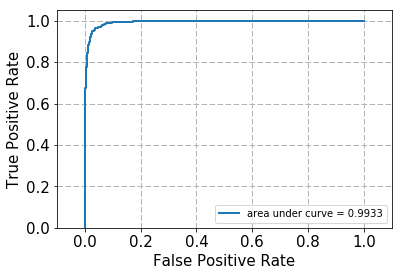

In [53]:
#Logistic Regression Classifier with penalty l2 and C=1000 and fit the log classifier

l2_Logclassifier = LogisticRegression(penalty = 'l2', C=100, random_state = 0)
l2_Logclassifier.fit(X_train_reduced,ng_train.target)
predicted = l2_Logclassifier.predict(X_test_reduced)
prob_scores = LogRModel.predict_proba(X_test_reduced)
fpr,tpr,_ = roc_curve(ng_test.target,prob_scores[:,1])
#print(prob_scores[:,1])

plot_roc(fpr,tpr)   

all_scores(ng_test.target, predicted)

cnf_matrix = confusion_matrix(ng_test.target,predicted)

print("Confusion Matrix:")
print (cnf_matrix)
print(" Coefficents of the Model:")
print(l2_Logclassifier.coef_)



Accuracy of the model is: 0.958095238095
Recall of the model is: 0.970440251572
Precision of the model is: 0.947788697789
F1 Score of the model is: 0.958980733375
Confusion Matrix:
[[1475   85]
 [  47 1543]]
 Coefficents of the Model:
[[ -2.51944071e+00   9.54834949e+01  -8.96124958e+00  -6.71000788e+01
    4.02919393e+01  -3.21176653e-01   1.47618351e+01  -8.88814227e+00
   -7.22207573e+00  -1.06812310e+01  -2.05950048e+00   1.56465445e+01
    2.92091329e+01   1.03635422e+01  -1.43307894e+01   2.40312246e+00
   -2.69524575e+00  -9.79438206e+00   3.50593264e+00  -1.34699518e+01
   -6.44869976e+00  -6.73490320e+00  -6.32257048e+00   1.40673629e+01
   -1.95104617e+00  -9.83837889e+00   2.53257177e+00   1.45210828e+00
    1.41154672e+01  -1.98625067e+01  -2.02119318e-01  -6.21939694e+00
    4.12047469e+00  -4.45978545e+00  -1.06867414e+01  -7.79987322e-01
    5.47086673e-02   2.78711845e-01   0.00000000e+00   3.85470006e+00
   -5.54999745e+00  -1.23211229e+00   5.36362150e+00   9.82172698

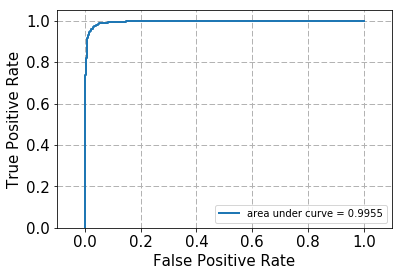

In [54]:
#Logistic Regression Classifier with penalty l1 and C=10 and fit the log classifier

l1_Logclassifier = LogisticRegression(penalty="l1", C=10)
l1_Logclassifier = l1_Logclassifier.fit(X_train_reduced,ng_train.target)

predicted = LogRModel.predict(X_test_reduced)

prob_scores = l1_Logclassifier.predict_proba(X_test_reduced)
fpr,tpr,_ = roc_curve(ng_test.target,prob_scores[:,1])


plot_roc(fpr,tpr)   

all_scores(ng_test.target, predicted)

cnf_matrix = confusion_matrix(ng_test.target,predicted)

print("Confusion Matrix:")
print (cnf_matrix)
print(" Coefficents of the Model:")
print(l1_Logclassifier.coef_)



##### Question 5: Regularization and Corss Validation on Logistics Regression

[ 0.93768799  0.95776017  0.95459163  0.949258    0.94920584]
Cross Validation Accuracy: 0.95 (+/- 0.01)
Accuracy of the model is: 0.953015873016
Recall of the model is: 0.952564102564
Precision of the model is: 0.952564102564
F1 Score of the model is: 0.952564102564
Confusion Matrix:
[[1516   74]
 [  74 1486]]
 Coefficents of the Model:
[[  0.          -2.80872969  12.88343607  -5.2249424   62.79004191
   47.91189243   0.           0.           0.           0.           0.
   -3.64282153   5.90255363   0.          21.34200984   5.17247176
   -5.96999189 -54.37945101  14.91190993   8.48110985  -7.74906648
   -7.39784443  46.25593387  -8.82064737 -29.52294889  -5.64155736
   45.55404144   0.           0.         -79.0206789   -2.65724678   0.
    0.           0.          19.64721558  31.94364679  -1.44381253
    2.65988066 -22.09913202   0.           0.          15.40484595
   10.51237093  -5.03192339   1.59006054  -7.48489825   1.23686055   0.
  -78.66182387   0.        ]]


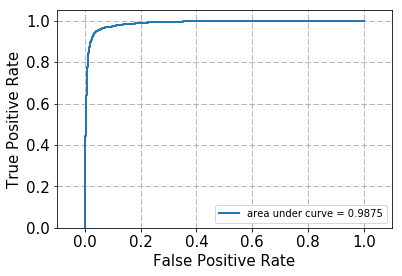

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Let us first do with L1 Regularization 

## C= 1000 means .001 regularization strength and 5-fold cross validation
LogR_L1Model = LogisticRegression(penalty="l1", C=1)
LogR_L1Model = LogR_L1Model.fit(W_train_reduced,ng_train.target)

scores = cross_val_score(LogR_L1Model, W_train_reduced, ng_train.target, cv=5, scoring = "f1_macro")
print(scores)
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

predicted = LogR_L1Model.predict(X_test_reduced)
prob_scores = LogR_L1Model.predict_proba(X_test_reduced)
fpr,tpr,_ = roc_curve(ng_test.target,prob_scores[:,1])

plot_roc(fpr,tpr)   

all_scores(ng_test.target, predicted)

cnf_matrix = confusion_matrix(ng_test.target,predicted)

print("Confusion Matrix:")
print (cnf_matrix)
print(" Coefficents of the Model:")
print(LogR_L1Model.coef_)


#### Testing the classifier Logistic Regression Model with some dummy test data

This is to see that classifier is not overfitting and works well for data that it has not seen

##### Table 1: Two well-separated classes
Computer Technology --> 1 --> comp.graphics comp.os.ms-windows.misc comp.sys.ibm.pc.hardware comp.sys.mac.hardware
Recreational Activity -->0--> rec.autos rec.motorcycles rec.sport.baseball rec.sport.hockey



In [14]:
docs_new = ['He is an OS, Java, graphics, GPU,Unix and C++ developer and the best in computer science', 
            'OpenGL on the GPU is fast', 
            'Seattle Mariners won third baseball game','Richard loves riding bikes',
            'There is a new sports car in the market',
            'I love machine learning and mathematics',
            'computer science is cool',
            'Artificial Intelligence, computer science and technological research and understanding is going on for a while',
            'Intelligent cloud and intelligent edge is the right strategy for software organizations',
            'Recent advancements in AI requires lot of computer power',
            'motorcycle riding is so much fun',
            'it can ride 60mph in just 10 seconds',
            'it snows a lot and hence like ice hockey',
            'windows system has improved over the years',
            'windows strategy in this baseball sport is the key',
            ' hockey cricket baseball and windows are cool',
             'scientif method of solving binary problems',
             'is this model going to overfit'
                        
           ]
X_new_counter = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counter)
X_new_reduced = model.transform(X_new_tfidf)

X_new_reduced = model.transform(X_new_tfidf)
predicted = LogR_L1Model.predict(X_new_reduced)
print(predicted)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, category))
    
# Table 1: Two well-separated classes
#Computer Technology --> 1 --> comp.graphics comp.os.ms-windows.misc comp.sys.ibm.pc.hardware comp.sys.mac.hardware
#Recreational Activity -->0--> rec.autos rec.motorcycles rec.sport.baseball rec.sport.hockey


[0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
'He is an OS, Java, graphics, GPU,Unix and C++ developer and the best in computer science' => 0
'OpenGL on the GPU is fast' => 1
'Seattle Mariners won third baseball game' => 0
'Richard loves riding bikes' => 0
'There is a new sports car in the market' => 0
'I love machine learning and mathematics' => 1
'computer science is cool' => 1
'Artificial Intelligence, computer science and technological research and understanding is going on for a while' => 0
'Intelligent cloud and intelligent edge is the right strategy for software organizations' => 1
'Recent advancements in AI requires lot of computer power' => 1
'motorcycle riding is so much fun' => 0
'it can ride 60mph in just 10 seconds' => 0
'it snows a lot and hence like ice hockey' => 0
'windows system has improved over the years' => 1
'windows strategy in this baseball sport is the key' => 1
' hockey cricket baseball and windows are cool' => 1
'scientif method of solving binary problems' => 1
'is t

#### Question 6 : Naïve Bayes classifier: train a GaussianNB classifier; plot the ROC curve and report the confusion matrix and calculate the accuracy, recall precision and F-1 score of this classifier.

Accuracy of the model is: 0.926031746032
Recall of the model is: 0.956603773585
Precision of the model is: 0.902670623145
F1 Score of the model is: 0.928854961832
Confusion Matrix:
[[1396  164]
 [  69 1521]]


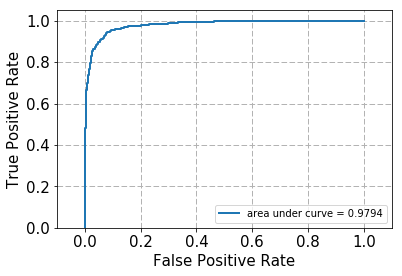

In [56]:
# We will use Naive Bayes classifier for this question
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(X_train_reduced, ng_train.target)
predicted1 = clf.predict(X_test_reduced)

prob_scores = clf.predict_proba(X_test_reduced)
fpr,tpr,_ = roc_curve(ng_test.target,prob_scores[:,1])
#print(prob_scores[:,1])

plot_roc(fpr,tpr)   

all_scores(ng_test.target, predicted1)

cnf_matrix = confusion_matrix(ng_test.target,predicted1)

print("Confusion Matrix:")
print (cnf_matrix)




##### Question 7: Grid search of parameters: • Construct a Pipeline that performs feature extraction, dimensionality reduction and classification; • Do grid search with 5-fold cross-validation to compare the following (use test accuracy as the score to compare):



In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
#LinearSVC().fit(X_train_tfidf, twenty_train.target).predict(X_new_tfidf)
from sklearn.base import BaseEstimator, TransformerMixin
class SparseToDenseArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, X, *_):
        if hasattr(X, 'toarray'):
            return X.toarray()
        return X

    def fit(self, *_):
        return self

from sklearn.decomposition import NMF

# nmf = NMF(n_components=50, init='random', random_state=0)

# "The purpose of the pipeline is to assemble several steps that can 
#  be cross-validated together while setting different parameters."
from sklearn.pipeline import Pipeline
pipeline1 = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('clf', LinearSVC()),
])
pipeline2 = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('toarr', SparseToDenseArray()),
    ('clf', GaussianNB()),
])

pipeline3 = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('toarr', SparseToDenseArray()),
    ('clf', LogisticRegression()),
])

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    prob_score = pipe.predict_proba(test_data)

    fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
    return pipe

In [17]:
## Prediciting using SVM
fit_predict_and_plot_roc(pipeline1, ng_train.data, ng_train.target, ng_test.data, ng_test.target)

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [ ]:
## Predicting using Gaussian NB
fit_predict_and_plot_roc(pipeline2, ng_train.data, ng_train.target, ng_test.data, ng_test.target)

## Predicting using LogisticRegression
fit_predict_and_plot_roc(pipeline1, ng_train.data, ng_train.target, ng_test.data, ng_test.target)

In [ ]:
from sklearn.model_selection import GridSearchCV
# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
# print(__doc__)
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(random_state=0)),
    ('clf', GaussianNB()),
],
memory=memory
)

N_FEATURES_OPTIONS = [10, 50]
C_OPTIONS = [0.1, 1, 10]
# REG_OPTIONS = ['l1', 'l2']
# REG_STRENGTH_OPTIONS = [0.1, 1, 10]

param_grid = [
    {
        'reduce_dim': [TruncatedSVD(), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'clf': [LinearSVC()],
        'clf__C': C_OPTIONS
    },
    {
        'reduce_dim': [TruncatedSVD(), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'clf': [GaussianNB()],
#         'clf__C': C_OPTIONS
    },
]
# reducer_labels = ['LinearSVC', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipeline, cv=3, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid.fit(ng_train.data, twenty_train.target)
rmtree(cachedir)